<a href="https://colab.research.google.com/github/Ritaprava95/Invoice_Processing/blob/main/DocumentProcessingRetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 21.31 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168020 sha256=fc6534b42c08a38d0ba32addb94fb52d056fe7ed3d4d4da1bbbc2b5517dead9c
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=baa854ddc3d8bf37eb9ba649295faefef89e2fc7b9aa7500c199208e38f41c6b
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [ ]:
# !pip install keras==2.3.1
# !pip install tensorflow==2.1.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import urllib
import os
from PIL import Image
import cv2

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

 ananthgiri.mp4			      invoice_entity.py
 ChatbotNukeera.zip		      Output.json
'Colab Notebooks'		     'TextClassification (1).zip'
 DSC_2818.jpg			      TextClassification.zip
 GT_Invoices			     'VHDL Tutorial.new.docx'
'How to get started with Drive.pdf'   weapons_box_sem_seg


In [ ]:
#os.mkdir("/content/drive/MyDrive/GT_Invoices/pics/")
#os.mkdir("/content/drive/MyDrive/GT_Invoices/annotations/")

In [ ]:
for f in os.listdir("/content/drive/MyDrive/GT_Invoices/"):
  if f.endswith(".tif"):
    os.rename("/content/drive/MyDrive/GT_Invoices/"+f, "/content/drive/MyDrive/GT_Invoices/pics/"+f)
    ann = f.split(".tif")[0]+"_gt.xml"
    os.rename("/content/drive/MyDrive/GT_Invoices/"+ann, "/content/drive/MyDrive/GT_Invoices/annotations/"+ann)


In [ ]:
os.mkdir("/content/drive/MyDrive/GT_Invoices/test_pics/")
os.mkdir("/content/drive/MyDrive/GT_Invoices/test_annotations/")

In [ ]:
!pip install bs4

In [ ]:
#df = pd.DataFrame(columns=['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name'])
from bs4 import BeautifulSoup
lst = []
for f in os.listdir("/content/drive/MyDrive/GT_Invoices/annotations/"):
  fl = open("/content/drive/MyDrive/GT_Invoices/annotations/"+f, "r", encoding="utf8")
  ann = fl.read()
  ann = BeautifulSoup(ann)
  fl.close()
  #print(ann)
  txt_reg = ann.find_all('textregion')
  for e in txt_reg:
    l  = [f.split("_gt")[0]+".tif"]
    x1,y1,x2,y2 = int(float(e.coords['points'].split()[0].split(',')[0])), int(float(e.coords['points'].split()[0].split(',')[1])), \
    int(float(e.coords['points'].split()[2].split(',')[0])), int(float(e.coords['points'].split()[2].split(',')[1]))
    try:
      if x2>x1 and y2>y1:
        class_name = e.property['value']
        l = l +[x1,y1,x2,y2,class_name]
        lst.append(l)
      else:
        pass
    except:
      pass


KeyboardInterrupt: ignored

In [ ]:
df = pd.DataFrame(columns=['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name'], data=lst)

In [ ]:
df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,0001139716.tif,5,29,665,255,supplier
1,0001139716.tif,15,257,666,290,invoice_info
2,0001139716.tif,16,293,668,354,receiver
3,0001139716.tif,18,356,668,696,positions
4,0001139716.tif,22,699,664,834,total


In [ ]:
df.shape

(4356, 6)

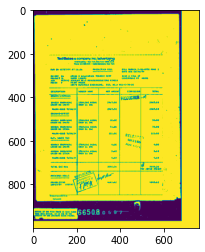

In [ ]:
im = Image.open("/content/drive/MyDrive/GT_Invoices/pics/0001139716.tif")
plt.imshow(im)

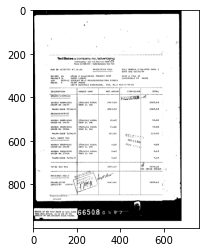

In [ ]:
im = cv2.imread("/content/drive/MyDrive/GT_Invoices/pics/0001139716.tif")
plt.imshow(im)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1)

In [ ]:
train_df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
2368,2028697011.tif,487,587,671,623,total
162,0001431487.tif,6,5,396,77,supplier
3445,2074417069.tif,50,105,428,186,receiver
595,0060076186.tif,13,580,748,613,total
3087,2063610122.tif,316,58,434,82,other


In [ ]:
train_df.shape

(3920, 6)

In [ ]:
 df.sample()['image_name'].values[0]

'0060053761.tif'

In [ ]:
def show_image_with_boxes(df):
  # pick a random image
  filepath = "/content/drive/MyDrive/GT_Invoices/pics/"+df.sample()['image_name'].values[0]

  # get all rows for this image
  df2 = df[df['image_name'] == filepath.split("/pics/")[-1]]
  im = np.array(cv2.imread(filepath))
  print(im.shape)
  # if there's a PNG it will have alpha channel
  #im = im[:,:,:3]
  
  for idx, row in df2.iterrows():
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    print(box)
    draw_box(im, box, color=(255,0,0))

  plt.axis('off')
  plt.imshow(im)
  plt.show()

(1000, 754, 3)
[694, 811, 720, 913]
[36, 2, 729, 32]
[497, 692, 689, 728]
[43, 681, 266, 718]
[491, 84, 700, 117]
[41, 248, 694, 643]
[28, 873, 677, 959]
[51, 82, 343, 133]
[51, 151, 267, 221]
[48, 48, 333, 79]


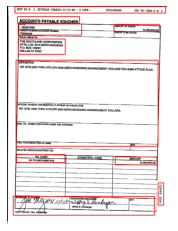

In [ ]:
show_image_with_boxes(train_df)

In [ ]:
train_df.to_csv('../drive/MyDrive/GT_Invoices/annotations.csv', index=False, header=None)

In [ ]:
classes = list(set(train_df[5]))
print(classes)

['receiver', 'other', 'invoice_info', 'total', 'positions', 'supplier']


In [ ]:
with open('../drive/MyDrive/GT_Invoices/classes.csv', 'w') as f:
  for i, class_name in enumerate(classes):
    f.write(f'{class_name},{i}\n')

In [ ]:
!head ../drive/MyDrive/GT_Invoices/classes.csv


receiver,0
other,1
invoice_info,2
total,3
positions,4
supplier,5


In [ ]:
!head ../drive/MyDrive/GT_Invoices/annotations.csv

2028697011.tif,487,587,671,623,total
0001431487.tif,6,5,396,77,supplier
2074417069.tif,50,105,428,186,receiver
0060076186.tif,13,580,748,613,total
2063610122.tif,316,58,434,82,other
2071021272.tif,572,184,680,206,other
2063162659.tif,54,507,602,746,positions
91668026.tif,58,322,648,530,positions
2505123539_3542.tif,102,913,725,982,other
2083197453.tif,381,175,733,314,supplier


In [ ]:
if not os.path.exists('/content/drive/MyDrive/GT_Invoices/snapshots'):
  os.mkdir('/content/drive/MyDrive/GT_Invoices/snapshots')

In [ ]:
PRETRAINED_MODEL = '/content/drive/MyDrive/GT_Invoices/snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to /content/drive/MyDrive/GT_Invoices/snapshots/_pretrained_model.h5


In [ ]:
!ls 

build		 images		  README.md	    setup.py
CONTRIBUTORS.md  keras_retinanet  requirements.txt  snapshots
examples	 LICENSE	  setup.cfg	    tests


In [ ]:
train_df = pd.read_csv('../drive/MyDrive/GT_Invoices/pics/annotations.csv', header=None)

In [ ]:
train_df.head()

,0,1,2,3,4,5
0,2028697011.tif,487,587,671,623,total
1,0001431487.tif,6,5,396,77,supplier
2,2074417069.tif,50,105,428,186,receiver
3,0060076186.tif,13,580,748,613,total
4,2063610122.tif,316,58,434,82,other


In [ ]:
PRETRAINED_MODEL

'/content/drive/MyDrive/GT_Invoices/snapshots/_pretrained_model.h5'

In [ ]:

batch_size = 4
num_images = len(train_df.groupby(0))
steps_per_epoch = num_images // batch_size + 1
steps_per_epoch

TypeError: ignored

In [ ]:
#os.rename("/content/drive/MyDrive/GT_Invoices/annotations.csv", "/content/drive/MyDrive/GT_Invoices/pics/annotations.csv")
#os.rename("/content/drive/MyDrive/GT_Invoices/classes.csv", "/content/drive/MyDrive/GT_Invoices/pics/classes.csv")

In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone \
  --random-transform \
  --weights {PRETRAINED_MODEL} \
  --batch-size 8 \
  --steps 65 \
  --epochs 15 \
  csv ../drive/MyDrive/GT_Invoices/pics/annotations.csv ../drive/MyDrive/GT_Invoices/pics/classes.csv

2021-05-23 10:06:53.210340: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-05-23 10:06:55.967650: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-23 10:06:55.968671: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-23 10:06:55.983900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-23 10:06:55.984867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-23 10:06:55.984913:

In [ ]:
for i in df.index:
  if df['y_min'][i]>df['y_max'][i]:
   print(i)

2419


In [ ]:
df.loc[[2419]]

,image_name,x_min,y_min,x_max,y_max,class_name
2419,2028729078.tif,57,660,695,373,positions


In [ ]:
!ls snapshots

resnet50_csv_01.h5  resnet50_csv_05.h5	resnet50_csv_09.h5  resnet50_csv_13.h5
resnet50_csv_02.h5  resnet50_csv_06.h5	resnet50_csv_10.h5  resnet50_csv_14.h5
resnet50_csv_03.h5  resnet50_csv_07.h5	resnet50_csv_11.h5  resnet50_csv_15.h5
resnet50_csv_04.h5  resnet50_csv_08.h5	resnet50_csv_12.h5


In [ ]:
pwd


'/content/keras-retinanet'

In [ ]:
os.listdir('../drive/MyDrive/GT_Invoices/')

['00043445_00043449_ocr.xml',
 '00920343_ocr.xml',
 '00920576_ocr.xml',
 '00555341_ocr.xml',
 '0000223278_ocr.xml',
 '0001136521_ocr.xml',
 '0001144288_ocr.xml',
 '01788629_ocr.xml',
 '0001431487_ocr.xml',
 '00922240_ocr.xml',
 '00921466_ocr.xml',
 '03724950_03724951_ocr.xml',
 '0001139626_ocr.xml',
 '0001139716_ocr.xml',
 '10399225_ocr.xml',
 '03725237_ocr.xml',
 '11230479_ocr.xml',
 '11238596_ocr.xml',
 '11002591_ocr.xml',
 '11237682_11237683_ocr.xml',
 '11237693_11237694_ocr.xml',
 '11237705_ocr.xml',
 '11002339_ocr.xml',
 '11230046_ocr.xml',
 '11225665_ocr.xml',
 '11024285_ocr.xml',
 '11315881_ocr.xml',
 '11320981_ocr.xml',
 '11315936_ocr.xml',
 '11315942_ocr.xml',
 '11295049_ocr.xml',
 '11315798_ocr.xml',
 '50120516-0516_ocr.xml',
 '0013040651_ocr.xml',
 '0013043193_ocr.xml',
 '0013046347_ocr.xml',
 '0011500947_ocr.xml',
 '0011899826_ocr.xml',
 '0013404965_ocr.xml',
 '0060027362_ocr.xml',
 '0060027402_ocr.xml',
 '0060026253_ocr.xml',
 '0060026250_ocr.xml',
 '0060026293_ocr.xml',
 

In [ ]:
from glob import glob
model_paths = glob('snapshots/resnet50_csv_*.h5')
latest_path = sorted(model_paths)[-1]
print("path:", latest_path)

model = models.load_model(latest_path, backbone_name='resnet50')
#print(1)
model = models.convert_model(model)
#print(2)

label_map = {}
for line in open('../drive/MyDrive/GT_Invoices/classes.csv'):
  #print(3)
  row = line.rstrip().split(',')
  print(row)
  label_map[int(row[1])] = row[0]

path: snapshots/resnet50_csv_15.h5
['receiver', '0']
['other', '1']
['invoice_info', '2']
['total', '3']
['positions', '4']
['supplier', '5']


In [ ]:
!head ../drive/MyDrive/GT_Invoices/classes.csv

In [ ]:
def show_image_with_predictions(df, threshold=0.6):
  # choose a random image
  row = df.sample()
  filepath = "/content/drive/MyDrive/GT_Invoices/pics/"+df.sample()[0].values[0]
  print("filepath:", filepath)

  # get all rows for this image
  df2 = df[df[0] == filepath.split("/pics/")[-1]]
  im = np.array(cv2.imread(filepath))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  #im = im[:,:,:3]

  # plot true boxes
  for idx, row in df2.iterrows():
    box = [
      row[1],
      row[2],
      row[3],
      row[4],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(im, axis=0)
  )

  # standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()


In [ ]:
label_map

{}

In [ ]:
filepath = "/content/drive/MyDrive/GT_Invoices/pics/"+train_df.sample()[0].values[0]
filepath

'/content/drive/MyDrive/GT_Invoices/pics/2083197453.tif'

In [ ]:
df2 = train_df[train_df[0] == filepath.split("/pics/")[-1]]
df2

,0,1,2,3,4,5
9,2083197453.tif,381,175,733,314,supplier
248,2083197453.tif,15,700,734,750,total
477,2083197453.tif,542,109,732,167,invoice_info
1343,2083197453.tif,15,318,734,698,positions
1882,2083197453.tif,16,913,673,987,invoice_info
2180,2083197453.tif,543,59,731,103,other
2349,2083197453.tif,15,172,372,314,receiver
3547,2083197453.tif,541,762,734,796,other
3684,2083197453.tif,430,802,672,908,supplier
3768,2083197453.tif,16,59,536,167,supplier


In [ ]:
im = np.array(Image.open(filepath))
plt.imshow()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

filepath: /content/drive/MyDrive/GT_Invoices/pics/2029377288.tif
im.shape: (1000, 765, 3)
[37, 849, 707, 918]
[104, 614, 709, 662]
[504, 86, 632, 147]
[561, 930, 709, 959]
[522, 190, 710, 292]
[620, 8, 733, 24]
[77, 269, 216, 297]
[22, 317, 745, 614]
[100, 796, 704, 840]
[32, 664, 706, 792]
[100, 48, 339, 191]


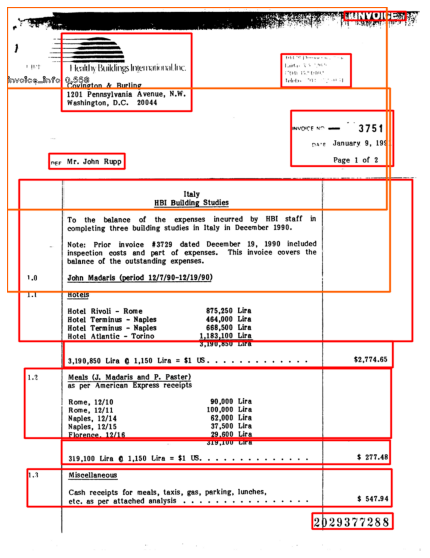

In [ ]:
show_image_with_predictions(train_df, threshold=0.5)